In [24]:
import pandas as pd
from google.colab import drive
import pathlib
import numpy as np
import os
import xml.etree.ElementTree as ET
from sklearn.preprocessing import MultiLabelBinarizer
import heapq
import matplotlib.pyplot as plt
import collections

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [7]:
appPermissionsMap = pd.DataFrame(columns=['AppName', 'Permissions'])

In [8]:
data_dir = "/content/drive/MyDrive/extractedAndroidManifests"
for fileName in os.listdir(data_dir):
  if fileName == '.DS_Store':
    continue
  androidManifest = ET.parse(data_dir+'/'+fileName)
  appName = fileName[:len(fileName)-20]
  permissionsList = []
  for permission in androidManifest.findall('uses-permission'):
    permissionsList.append(permission.attrib['{http://schemas.android.com/apk/res/android}name'])
  appPermissionsMap.loc[len(appPermissionsMap.index)] = [appName, permissionsList]

In [9]:
appPermissionsMap

,AppName,Permissions
0,1311184772_com.sabkatraffic,"[android.permission.ACCESS_FINE_LOCATION, andr..."
1,9999999999999_com.ahorrecomparando.chistes_esp...,[android.permission.INTERNET]
2,1311184772_com.yodesoft.android.game.yopuzzleC...,"[android.permission.VIBRATE, android.permissio..."
3,1310635736_demo.galmoori.datausage,"[android.permission.VIBRATE, android.permissio..."
4,1310178647_com.veganlosangeles.android,"[android.permission.INTERNET, android.permissi..."
...,...,...
140,1312623411_com.appcookr.app_kr_349,"[android.permission.RESTART_PACKAGES, android...."
141,9999999999999_com.zlango.zms,"[android.permission.ACCESS_NETWORK_STATE, andr..."
142,1311184772_com.yodesoft.android.game.yopuzzleC...,"[android.permission.VIBRATE, android.permissio..."
143,1310178647_us.lovinghut.android,"[android.permission.INTERNET, android.permissi..."


In [10]:
multiLableBinarizer = MultiLabelBinarizer(sparse_output=True)
appPermissionsMap = appPermissionsMap.join(pd.DataFrame.sparse.from_spmatrix(multiLableBinarizer.fit_transform(appPermissionsMap.pop('Permissions')),index=appPermissionsMap.index,columns=multiLableBinarizer.classes_))

In [11]:
appPermissionsMap

,AppName,andorid.permission.WRITE_EXTERNAL_STORAGE,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_COARSE_UPDATES,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_GPS,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,...,com.speaktoit.assistant.permission.C2D_MESSAGE,com.springpad.permission.C2D_MESSAGE,com.tripadvisor.android.lib.tamobile.permission.MAPS_RECEIVE,com.tripadvisor.tripadvisor.permission.C2D_MESSAGE,com.yahoo.mobile.client.android.permissions.YAHOO_INTER_APP,me.everything.launcher.permission.C2D_MESSAGE,me.everything.launcher.permission.READ_SETTINGS,me.everything.launcher.permission.WRITE_SETTINGS,org.adw.launcher.permission.READ_SETTINGS,vsin.t16_funny_photo.permission.C2D_MESSAGE
0,1311184772_com.sabkatraffic,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9999999999999_com.ahorrecomparando.chistes_esp...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1311184772_com.yodesoft.android.game.yopuzzleC...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1310635736_demo.galmoori.datausage,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1310178647_com.veganlosangeles.android,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1312623411_com.appcookr.app_kr_349,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,9999999999999_com.zlango.zms,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,1311184772_com.yodesoft.android.game.yopuzzleC...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,1310178647_us.lovinghut.android,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
top10FrequentPermissions = []

In [13]:
for permission in appPermissionsMap.columns[1:]:
  permissionCount = len(appPermissionsMap[appPermissionsMap[permission]==1])
  heapq.heappush(top10FrequentPermissions, (permissionCount, permission))

In [14]:
heapq.nlargest(10, top10FrequentPermissions)

[(136, 'android.permission.INTERNET'),
 (108, 'android.permission.ACCESS_NETWORK_STATE'),
 (82, 'android.permission.WRITE_EXTERNAL_STORAGE'),
 (65, 'android.permission.VIBRATE'),
 (60, 'android.permission.READ_PHONE_STATE'),
 (59, 'android.permission.ACCESS_FINE_LOCATION'),
 (42, 'android.permission.WAKE_LOCK'),
 (40, 'android.permission.ACCESS_COARSE_LOCATION'),
 (39, 'android.permission.READ_CONTACTS'),
 (31, 'android.permission.CAMERA')]

In [15]:
appsWithMostPermissions = []

In [16]:
for index, row in appPermissionsMap.iterrows():
  permissionsCount = np.sum(row[1:])
  heapq.heappush(appsWithMostPermissions, (permissionsCount, row[0]))

In [17]:
heapq.nlargest(10, appsWithMostPermissions)

[(67, 'me.everything.launcher'),
 (41, '9999999999999_com.android.phone'),
 (40, 'com.speaktoit.assistant'),
 (29, '1311184772_es.codefactory.android.app.ma.vocalizerenudemo'),
 (26, 'com.bluetornadosf.smartypants-190'),
 (26, 'com.avast.android.mobilesecurity-2129'),
 (24, '1310178647_com.yahoo.mobile.client.android.im'),
 (23, '1317675242_com.google.android.apps.plus'),
 (21, 'com.booking'),
 (17, '9999999999999_com.freemytext.android.mms')]

In [30]:
counter = collections.Counter(appPermission[0] for appPermission in appsWithMostPermissions)

In [34]:
counter

Counter({0: 1,
         2: 15,
         1: 2,
         4: 11,
         3: 10,
         5: 30,
         6: 14,
         8: 8,
         7: 11,
         13: 6,
         16: 4,
         14: 2,
         17: 3,
         9: 6,
         29: 1,
         26: 2,
         24: 1,
         11: 2,
         12: 8,
         40: 1,
         10: 2,
         15: 1,
         67: 1,
         41: 1,
         21: 1,
         23: 1})

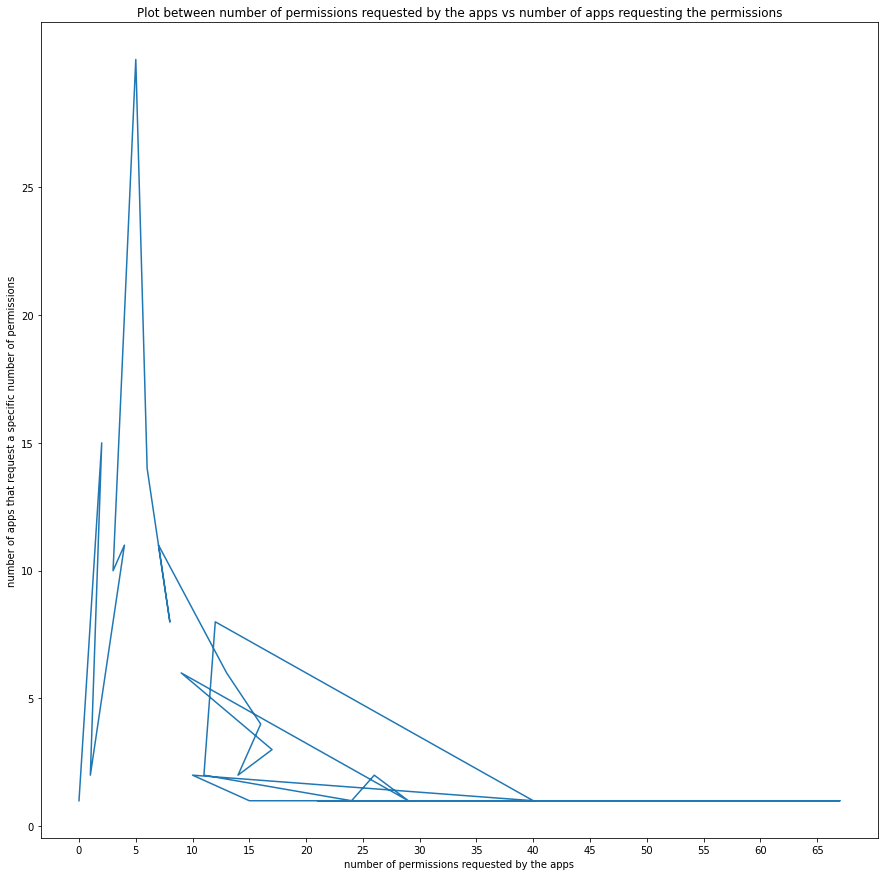

In [40]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.xticks(range(0, max(counter.keys()), 5))
plt.yticks(range(0, max(counter.values()), 5))
plt.plot(list(counter.keys()), list(counter.values()))
plt.title('Plot between number of permissions requested by the apps vs number of apps requesting the permissions')
plt.xlabel('number of permissions requested by the apps')
plt.ylabel('number of apps that request a specific number of permissions')
plt.show()